In [1]:

import sys
import pandas as pd
import datetime
import requests
import json
import numpy as np
from pandas import ExcelWriter
import os
import glob
import pytz
from dateutil.tz import gettz
import timeit
# from datetime import datetime
from datetime import timedelta
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_data(devid, acc_token, address, start_time, end_time):
    df=pd.DataFrame([])
    r2 = requests.get(
        url=address + "/api/plugins/telemetry/DEVICE/" + devid + "/values/timeseries?keys=cnrgA,cnrgB,cnrgC&startTs=" + start_time + "&endTs=" + end_time + "&agg=NONE&limit=1000000",
        headers={'Content-Type': 'application/json', 'Accept': '*/*', 'X-Authorization': acc_token}).json()
    if r2:
        
        # read all descriptors at once
        for desc in r2.keys():
            print()
            df1 = pd.DataFrame(r2[desc])
            df1.set_index('ts', inplace=True)
            df1.columns = [desc]
            df = pd.concat([df,df1], axis = 1)
                   

        if df.empty == False:
        
            df.reset_index(drop=False, inplace=True)
            #df['ts'] = pd.to_datetime(df['ts'], unit='ms')
            
    
            # Set timestamp as index, convert all columns to float
            df = df.sort_values(by=['ts'])
            #df['ts'] = df['ts'].dt.tz_localize('utc').dt.tz_convert(tmzn)
            df.reset_index(drop=True, inplace=True)
            df.set_index('ts',inplace = True, drop = True)
            for col in df.columns:
                df[col] = df[col].astype('float')
    return df

In [3]:
did ={'102.116.000254':'16f5dc00-4ce3-11ea-8762-6bf954fc5af1'}

In [4]:
devid = did['102.116.000254'] 
start_time = '1597523400000' # Aug 15 2020
end_time = '1607719200000' # 12 Dec 2020 


#address = "http://157.230.210.37:8081"
address = "https://m3.meazon.com"


r = requests.post(address + "/api/auth/login",json={'username': 'a.andrikopoulos19@meazon.com', 'password': 'andrikopMeazon13'}).json()


# acc_token is the token to be used in the next request
acc_token = 'Bearer' + ' ' + r['token']

df = read_data(devid, acc_token, address, start_time, end_time)
df.head()

,cnrgA,cnrgB,cnrgC
ts,,,
1597523700000,2242386.0,161422.0,6.974000e+05
1597524000000,2242415.0,161422.0,6.974150e+05
1597524300000,2242437.0,161427.0,4.278888e+09
1597524600000,2242466.0,161431.0,4.278888e+09
1597524900000,2242495.0,161434.0,4.278888e+09


In [5]:
df.tail()

,cnrgA,cnrgB,cnrgC
ts,,,
1607718000000,3320190.0,326217.0,4.279463e+09
1607718300000,3320229.0,326223.0,2.300000e+01
1607718600000,3320268.0,326230.0,4.400000e+01
1607718900000,3320307.0,326236.0,6.400000e+01
1607719200000,3320347.0,326243.0,8.400000e+01


In [6]:
dif = df['cnrgC'].iloc[2] - df['cnrgC'].iloc[1]
dif

4278190092.0

In [17]:
tmp = df.copy()

In [18]:
tmp.loc[tmp.index[2:-4], 'cnrgC'] = tmp['cnrgC'] - dif
tmp.tail(7)

,cnrgA,cnrgB,cnrgC
ts,,,
1607715000000,3320131.0,326197.0,1272612.0
1607715300000,3320171.0,326211.0,1272642.0
1607718000000,3320190.0,326217.0,1272656.0
1607718300000,3320229.0,326223.0,23.0
1607718600000,3320268.0,326230.0,44.0
1607718900000,3320307.0,326236.0,64.0
1607719200000,3320347.0,326243.0,84.0


In [19]:
tmp = tmp.iloc[2:]
tmp.head()

,cnrgA,cnrgB,cnrgC
ts,,,
1597524300000,2242437.0,161427.0,697415.0
1597524600000,2242466.0,161431.0,697426.0
1597524900000,2242495.0,161434.0,697436.0
1597525200000,2242524.0,161438.0,697447.0
1597525500000,2242552.0,161441.0,697457.0


In [20]:
tmp.tail()

,cnrgA,cnrgB,cnrgC
ts,,,
1607718000000,3320190.0,326217.0,1272656.0
1607718300000,3320229.0,326223.0,23.0
1607718600000,3320268.0,326230.0,44.0
1607718900000,3320307.0,326236.0,64.0
1607719200000,3320347.0,326243.0,84.0


In [21]:
tmp = tmp.iloc[:-4]
tmp.tail()

,cnrgA,cnrgB,cnrgC
ts,,,
1607714400000,3320052.0,326168.0,1272548.0
1607714700000,3320092.0,326182.0,1272580.0
1607715000000,3320131.0,326197.0,1272612.0
1607715300000,3320171.0,326211.0,1272642.0
1607718000000,3320190.0,326217.0,1272656.0


In [22]:
end = tmp['cnrgC'].iloc[-1]
start = tmp['cnrgC'].iloc[0]

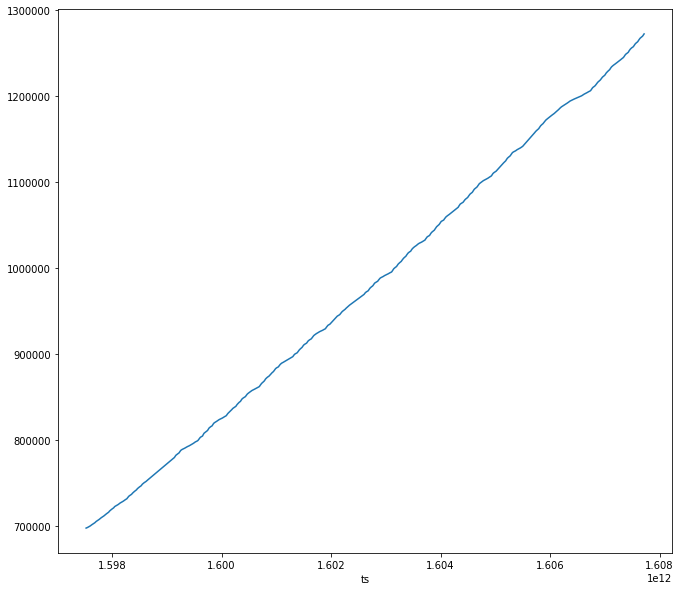

In [23]:
tmp['cnrgC'].plot(figsize=[11,10])

In [24]:
tmp['cnrgC'] = tmp['cnrgC'].astype(int)

tmp['cnrgC'] = tmp['cnrgC'].apply(str)
tmp = tmp[['cnrgC']]

# tmp['ts'] = tmp.index.values.astype(np.int64) // 10 ** 6
# tmp['ts'] = tmp['ts'].astype(int)
# tmp.set_index('ts',inplace = True, drop = True)
nrgdict = tmp.to_dict('index')
nrgdict

{1597524300000: {'cnrgC': '697415'},
 1597524600000: {'cnrgC': '697426'},
 1597524900000: {'cnrgC': '697436'},
 1597525200000: {'cnrgC': '697447'},
 1597525500000: {'cnrgC': '697456'},
 1597525800000: {'cnrgC': '697467'},
 1597526100000: {'cnrgC': '697478'},
 1597526400000: {'cnrgC': '697488'},
 1597526700000: {'cnrgC': '697499'},
 1597527000000: {'cnrgC': '697509'},
 1597527300000: {'cnrgC': '697519'},
 1597527600000: {'cnrgC': '697530'},
 1597527900000: {'cnrgC': '697540'},
 1597528200000: {'cnrgC': '697551'},
 1597528500000: {'cnrgC': '697561'},
 1597528800000: {'cnrgC': '697570'},
 1597529100000: {'cnrgC': '697580'},
 1597529400000: {'cnrgC': '697589'},
 1597529700000: {'cnrgC': '697598'},
 1597530000000: {'cnrgC': '697607'},
 1597530300000: {'cnrgC': '697615'},
 1597530600000: {'cnrgC': '697624'},
 1597530900000: {'cnrgC': '697632'},
 1597531200000: {'cnrgC': '697642'},
 1597531500000: {'cnrgC': '697651'},
 1597531800000: {'cnrgC': '697660'},
 1597532100000: {'cnrgC': '697669'},
 

In [25]:
tmp.to_csv('joseph_backup_new/254.csv')


In [26]:
df.to_csv('joseph_backup_new/254_old.csv')